# Plot earthquake data downloaded from the USGS ANSS ComCat

In [91]:
# import modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd

## Read in the earthquake data

Firstly read in the CSV file downloaded from ComCat. This particular file has all historical earthquakes within 25 km of the San Andreas fault of M > 3

In [7]:
DataDirectory = '/home/bjdd72/TopographicData/TopographicData/san_andreas/Earthquakes/'
df = pd.read_csv(DataDirectory+'SAF_earthquakes_25km_dist.csv')

/home/bjdd72/miniconda3/envs/fault-swath/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
print(df.columns)

Index(['id', 'time', 'latitude', 'longitude', 'depth', 'magnitude', 'location',
       'magtype', 'url', 'eventtype',
       ...
       'us_Mwb_mrp', 'us_Mwb_mtp', 'us_Mwb_np1_strike', 'us_Mwb_np1_dip',
       'us_Mwb_np1_rake', 'us_Mwb_np2_strike', 'us_Mwb_np2_dip',
       'us_Mwb_np2_rake', 'fault_dist', 'direction'],
      dtype='object', length=170)


## Plot the earthquakes as a time series

Firstly, let's plot the magnitude of the earthquakes through time. The earthquake magnitudes are calculated using a number of different methods: we want to visualise how this compares with time, so we'll colour each earthquake by the method used to calculate the magnitude. 

In [120]:
# Convert the dataframe index to a pandas datetime
df.index = pd.to_datetime(df['time'])

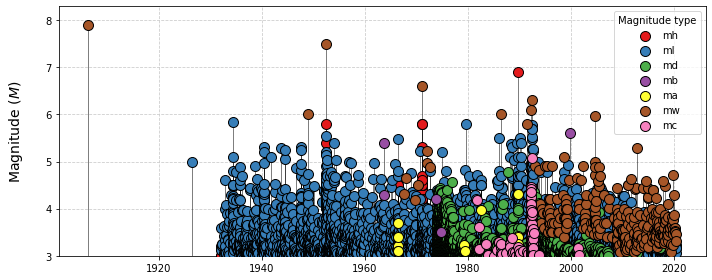

In [158]:
# set up a figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(color='0.8', linestyle='--', which='both')
# make a stem plot
markerline, stemlines, baseline = ax.stem(df.index, df.magnitude, linefmt='k', use_line_collection=True)
# adjust the markers and lines
markerline.set_markeredgecolor('k')
stemlines.set_linewidth(0.5)
baseline.set_color('white')

# add a scatter plot to set the colour of the markers to reflect the magnitude type
# Get unique names of magnitude types
uniq = list(set(df['magtype']))

# Set the color map to match the number of types
z = range(1,len(uniq))
# Define the color map and normalize to total number of types
hot = plt.get_cmap('Set1')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=hot)
print(scalarMap)
# Plot each magnitude type separately
for i in range(len(uniq)):
    this_df = df[df['magtype'] == uniq[i]]
    plt.scatter(this_df.index, this_df.magnitude, s=100, color=scalarMap.to_rgba(i), edgecolor='k', label=uniq[i], zorder=100)

# configure plot options
plt.ylabel('Magnitude ($M$)', fontsize=14, labelpad=20)
plt.xlabel('', fontsize=14)
plt.ylim(3,)
plt.legend(title = 'Magnitude type')
plt.tight_layout()

In [159]:
# Now save the figure
fig.savefig(DataDirectory+'SAF_earthquakes_25km_timeseries.png', dpi=300)
plt.clf()

<Figure size 432x288 with 0 Axes>

## Make a magnitude-frequency plot

One of the most common plots of earthquake records we can make is a plot of magnitude and frequency. This is often used for seismic hazard assessment.

In [135]:
# Firstly, let's group the dataframe by the magnitude
gr = df.groupby(['magnitude'])['time'].agg(['count']).reset_index()

Text(0, 0.5, 'log(Frequency)')

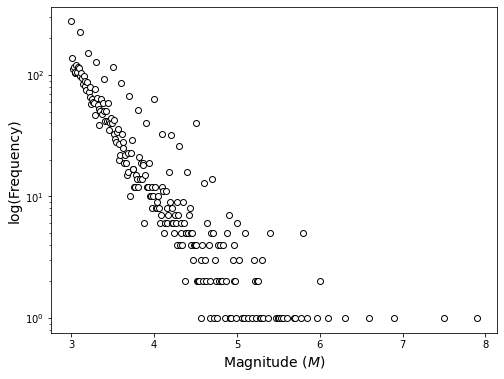

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plt.scatter(gr['magnitude'], gr['count'], edgecolor='k', facecolor='white')
plt.yscale('log')
plt.xlabel('Magnitude ($M$)', fontsize=14)
plt.ylabel('log(Frequency)', fontsize=14)